<a href="https://colab.research.google.com/github/sxqqslf/TensorflowDaily/blob/master/ResearchAndExpermentation/CustomTraining_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

tf.enable_eager_execution()

x = tf.zeros([10, 10])
x += 2
print(x)

In [0]:
v = tf.Variable(1.0)
assert v.numpy() == 1.0

v.assign(3.0)
assert v.numpy() == 3.0

v.assign(tf.square(v))
assert v.numpy() == 9.0

In [0]:
class Model(object):
  def __init__(self):
    self.W = tf.Variable(5.0)
    self.b = tf.Variable(0.0)
    
  def __call__(self, x):
    return self.W * x + self.b
  
model = Model()

assert model(3.0).numpy() == 15.0

In [0]:
def loss(predicted_y, desired_y):
  return tf.reduce_mean(tf.square(predicted_y - desired_y))

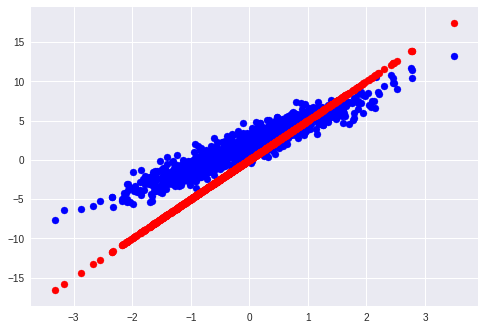

Current loss:
8.976915


In [11]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs = tf.random_normal(shape=[NUM_EXAMPLES])
noise  = tf.random_normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

import matplotlib.pyplot as plt
plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss:'),
print(loss(model(inputs), outputs).numpy())

In [0]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  dW, db = t.gradient(current_loss, [model.W, model.b])
  model.W.assign_sub(learning_rate * dW)
  model.b.assign_sub(learning_rate * db)

Epoch  0: W=5.00 b=0.00, loss=8.97692
Epoch  1: W=4.60 b=0.40, loss=6.06004
Epoch  2: W=4.27 b=0.72, loss=4.19908
Epoch  3: W=4.02 b=0.98, loss=3.01178
Epoch  4: W=3.81 b=1.19, loss=2.25427
Epoch  5: W=3.65 b=1.35, loss=1.77097
Epoch  6: W=3.52 b=1.48, loss=1.46261
Epoch  7: W=3.41 b=1.59, loss=1.26587
Epoch  8: W=3.33 b=1.67, loss=1.14035
Epoch  9: W=3.27 b=1.74, loss=1.06026
Epoch 10: W=3.21 b=1.79, loss=1.00916
Epoch 11: W=3.17 b=1.83, loss=0.97656
Epoch 12: W=3.14 b=1.87, loss=0.95575
Epoch 13: W=3.11 b=1.90, loss=0.94248
Epoch 14: W=3.09 b=1.92, loss=0.93401
Epoch 15: W=3.07 b=1.94, loss=0.92861
Epoch 16: W=3.06 b=1.95, loss=0.92516
Epoch 17: W=3.05 b=1.96, loss=0.92296
Epoch 18: W=3.04 b=1.97, loss=0.92156
Epoch 19: W=3.03 b=1.98, loss=0.92066


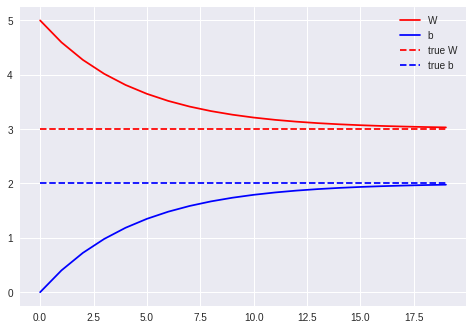

In [15]:
model = Model()

Ws, bs = [], []
epochs = range(20)
for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(model(inputs), outputs)
  
  train(model, inputs, outputs, learning_rate=0.1)
  print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' % (epoch, Ws[-1], bs[-1], current_loss))
  
plt.plot(epochs, Ws, 'r')
plt.plot(epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
        [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true W', 'true b'])
plt.show()